In [1]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from sklearn.svm import SVC
!pip install qpsolvers
import qpsolvers
from qpsolvers import solve_qp
!pip install qpsolvers[cvxopt]
!pip install qpsolvers[open_source_solvers]
!pip install qpsolvers[clarabel]

In [2]:
n_gen = 100
n_samples = 2*n_gen

In [3]:
def rbf(x,y,l=1):
    """Gaussian kernel

    Parameters
    -------------------------------
    x : float
    a real number

    y : float
    a real number

    l: float, non zero
    a scale parameter
    -------------------------------
    """
    dim = x.shape[0]
    vect = np.empty(dim)
    if dim == y.shape[0]  :
        d = np.exp((-1)*((np.linalg.norm(x-y))/(2*(l**2))))
        return d
    else :
        for i in range(dim):
            vect[i] = np.exp((-1)*(np.linalg.norm(x[i] - y))/(2*(l**2)))
        return vect

In [4]:
np.random.seed(786567154)
data_pos = np.random.multivariate_normal(mean=np.array((-1,-1)), cov=np.eye(2)*0.5, size=n_gen)
data_ne = np.random.multivariate_normal(mean=np.array((1.5,1.5)), cov=np.eye(2)*0.5,size=n_gen)

In [5]:
whole_data = np.vstack((data_pos,data_ne))
labels = np.hstack((np.ones(n_gen),np.ones(n_gen)*-1))

In [6]:
df = pd.DataFrame(whole_data)
df.columns = ['x1','x2']
df['labels'] = labels

In [7]:
svm_test = SVC(kernel='sigmoid',probability=True).fit(X=df.to_numpy()[:,:2],y=df.to_numpy()[:,2])

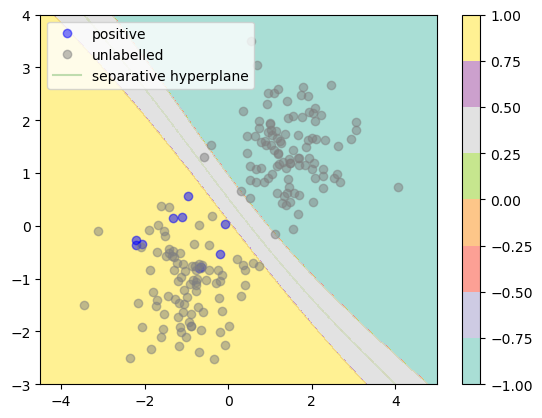

In [19]:
xx, yy = np.meshgrid(np.linspace(-4.5,5,500), np.linspace(-3,4,500))
both = svm_test.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = both[:,1] - both[:,0]
for i in range(500**2):
    if Z[i] < 1e-4 and Z[i]>-1e-4:
        Z[i] = 0
    elif Z[i] > 0.5:
        Z[i] = 1
    elif Z[i] < -0.5:
        Z[i] = -1
    else:
        Z[i] = 0.5
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.Set3)
plt.plot(data_pos[:10,0], data_pos[:10,1], 'o',alpha = 0.5, label='positive', color='b')
plt.plot(data_ne[:,0], data_ne[:,1], 'o',alpha = 0.5, color='gray')
plt.plot(data_pos[10:,0], data_pos[10:,1], 'o',alpha = 0.5, label='unlabelled', color='gray')
plt.plot(0,0,'g',alpha=0.25,label='separative hyperplane')
plt.legend()
plt.colorbar()
plt.savefig('for_report_unlab.png')
plt.show()

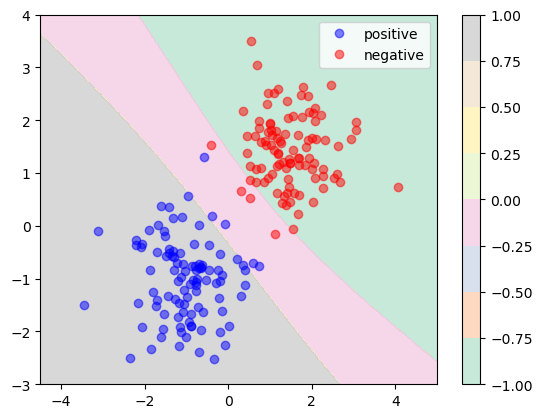

In [9]:
Z = both[:,1] - both[:,0]
for i in range(500**2):
    if Z[i] > 0.8:
        Z[i] = 1
    elif Z[i] < -0.8:
        Z[i] = -1
    else:
        Z[i] = 0
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.Pastel2)
plt.plot(data_pos[:,0], data_pos[:,1], 'bo',alpha = 0.5, label='positive')
plt.plot(data_ne[:,0], data_ne[:,1], 'ro',alpha = 0.5, label='negative')
plt.legend()
plt.colorbar()
plt.savefig('uncertainty_08.png')
plt.show()

In [10]:
probas = svm_test.predict_proba(whole_data)
list_1 = np.array(np.where(probas[:,1] - probas[:,0] < 0.5))
list_2 = np.array(np.where(probas[:,1] - probas[:,0] >-0.5))

In [11]:
removal = []
for i in range(list_1.shape[1]):
    if list_1[0,i] in list_2:
        removal.append(i)

In [12]:
removal

[0, 41]

In [13]:
imp_dot = data_pos[91,:]

In [14]:
test_1 = svm_test.predict_proba(data_pos[41,:].reshape(1,2))

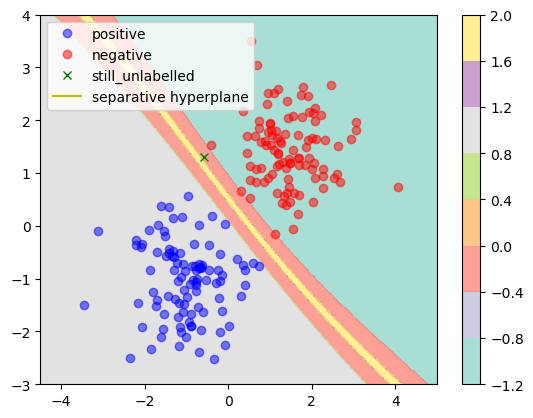

In [15]:
true_data_pos = np.delete(data_pos,91,axis=0)
xx, yy = np.meshgrid(np.linspace(-4.5,5,500), np.linspace(-3,4,500))
both = svm_test.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = both[:,1] - both[:,0]
for i in range(500**2):
    if Z[i] < 1e-1 and Z[i]>-1e-1:
        Z[i] = 2
    elif Z[i] > 0.5:
        Z[i] = 1
    elif Z[i] < -0.5:
        Z[i] = -1
    else:
        Z[i] = 0
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.Set3)
plt.plot(true_data_pos[:,0], true_data_pos[:,1], 'bo',alpha = 0.5, label='positive')
plt.plot(data_ne[:,0], data_ne[:,1], 'ro',alpha = 0.5, label='negative')
plt.plot(imp_dot[0], imp_dot[1],'gx', label='still_unlabelled')
plt.plot(0,0,'y',label='separative hyperplane')
plt.legend()
plt.colorbar()
plt.savefig('for_report_with_hyperplane.png')
plt.show()

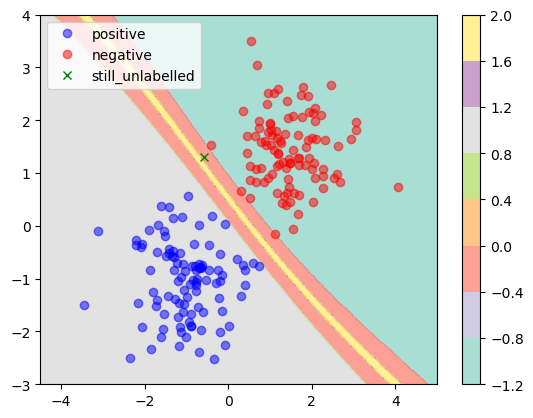

In [16]:
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.Set3)
plt.plot(true_data_pos[:,0], true_data_pos[:,1], 'bo',alpha = 0.5, label='positive')
plt.plot(data_ne[:,0], data_ne[:,1], 'ro',alpha = 0.5, label='negative')
plt.plot(imp_dot[0], imp_dot[1],'gx', label='still_unlabelled')
plt.legend()
plt.colorbar()
plt.savefig('uncertainty_and_unlabelled_and_hyperplane.png')
plt.show()